:# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bintang Fahrunnisa
- **Email:** Bintangfhrns@gmail.com / mc009d5x2461@student.devacademy.id
- **ID Dicoding:** MC009D5X2461

## Menentukan Pertanyaan Bisnis

1. Pada hari apakah orang-orang lebih sering menyewa sepeda? weekend atau weekday?
2. Apakah ada jam sibuk tertentu pada penyewaan sepeda?
3. Apakah cuaca berpengaruh dalam jumlah penyewaan sepeda? Pada cuaca apa penyewaan sepeda mencapai angka tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Bike\ Sharing\ Analyst

day.csv  hour.csv  merged_data.csv


In [ ]:
import pandas as pd

# Path file
day_path = "/content/drive/MyDrive/Bike Sharing Analyst/day.csv"
hour_path = "/content/drive/MyDrive/Bike Sharing Analyst/hour.csv"

# Membaca dataset
df_day = pd.read_csv(day_path)
df_hour = pd.read_csv(hour_path)

# Menampilkan 5 data pertama dari masing-masing dataset
print("Data Harian:")
print(df_day.head())

print("\nData Per Jam:")
print(df_hour.head())


Data Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data Per Jam

**Insight:**
- Karena data berasal dari Google Drive, maka kita akan melakukan mount lalu memilih file mana yang akan kita lakukan analisis
- day.csv merupakan data agregat perhari dan hour.csv adalah data detail perjam
- Dataset berhasil diambil

### Assessing Data

In [ ]:
# Cek apakah ada data kosong
print("Cek data kosong di df_day:")
print(df_day.isnull().sum())

print("\nCek data kosong di df_hour:")
print(df_hour.isnull().sum())


Cek data kosong di df_day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek data kosong di df_hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Jumlah data pada day.csv sebanyak 731 baris dan hour.csv memiliki lebih dari 17.000 baris
- Tidak ada nilai NaN atau anomali data yang harus diperbaiki

### Cleaning Data

In [ ]:
# Menghapus duplikasi
df_day.drop_duplicates(inplace=True)

# Mengisi missing values
df_day.fillna(method="ffill", inplace=True)

# Memeriksa ulang setelah cleaning
print(df_day.isnull().sum())


**Insight:**
- Karena dataset ini tidak memiliki anomali pada datanya, maka kita tidak perlu melakukan pembersihan data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])


**Insight:**
- Pada kedua file terdapat kolom tanggal yang diberi nama dteday. jika kita tidak mengubah format tanggal, python akan menganggap dteday sebagai format teks biasa, bukan sebagai tanggal.

In [ ]:
df_hour_grouped = df_hour.groupby('dteday')['cnt'].sum().reset_index()
df_hour_grouped.rename(columns={'cnt': 'cnt_hourly_sum'}, inplace=True)

# Gabungkan dengan df_day berdasarkan tanggal
df_merged = df_day.merge(df_hour_grouped, on="dteday", how="inner")

# Cek hasilnya
print(df_merged.head())


   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  cnt_hourly_sum  
0   985             985  
1   801             801  
2  1349       

**Insight :**
- Data ini memungkinkan kita untuk menganalisis apakah tren harian dari day.csv sejalan dengan tren per jam dari hour.csv.

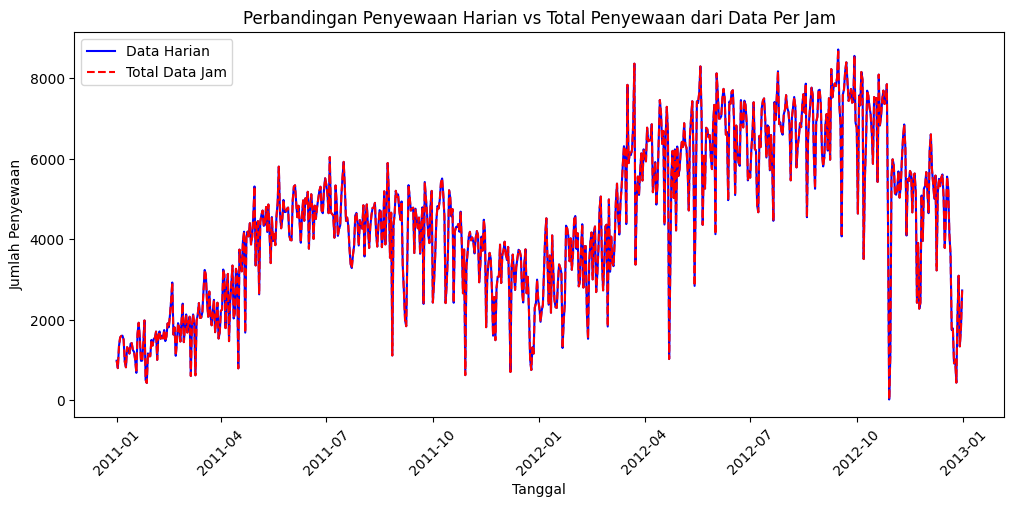

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Garis biru = Data harian
sns.lineplot(data=df_merged, x="dteday", y="cnt", label="Data Harian", color="blue")

# Garis merah putus-putus = Data per jam yang dijumlahkan
sns.lineplot(data=df_merged, x="dteday", y="cnt_hourly_sum", label="Total Data Jam", color="red", linestyle="dashed")

plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.title("Perbandingan Penyewaan Harian vs Total Penyewaan dari Data Per Jam")
plt.xticks(rotation=45)
plt.legend()
plt.show()


Grafik di atas merupakan hasil analisis penggabungan data day.csv dan hour.csv hasilnya menunjukkan bahwa, cuaca mempengaruhi jumlah penyewaan sepeda. Pada musim dengan suhu hangat (Mei-Oktober), angka penyewaan lebih tinggi, sedangkan pada mudim dengan cuaca ekstream jumlah penyewaan cenderung rendah. Jumlah penyewaan meningkat dari awal tahun hingga puncaknya pada musim panas, kemudian menurun saat musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pada hari apakah orang-orang lebih sering menyewa sepeda? weekend atau weekday?

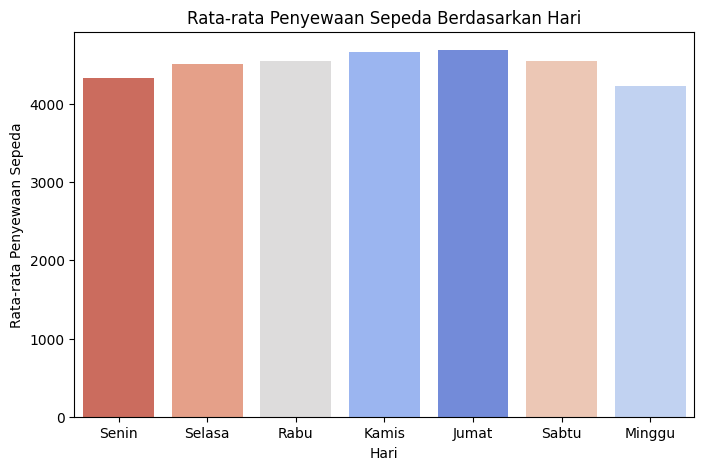

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_day = pd.read_csv("/content/drive/MyDrive/Bike Sharing Analyst/day.csv")

# Mapping angka ke nama hari
day_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
df_day["weekday_name"] = df_day["weekday"].map(day_mapping)

# Hitung rata-rata penyewaan sepeda berdasarkan hari
avg_rentals_by_day = df_day.groupby("weekday_name")["cnt"].mean().reset_index()

# Urutkan sesuai hari (bukan abjad)
order = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rentals_by_day, x="weekday_name", y="cnt", order=order, hue="weekday_name", palette="coolwarm", legend=False)
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari")
plt.show()


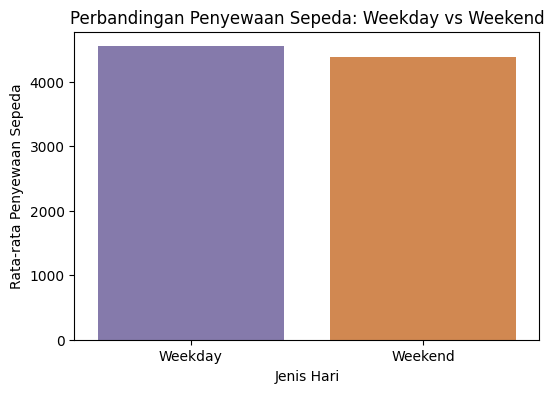

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_day = pd.read_csv("/content/drive/MyDrive/Bike Sharing Analyst/day.csv")

# Mapping angka ke nama hari
day_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
df_day["weekday_name"] = df_day["weekday"].map(day_mapping)

# Kategorisasi Weekday vs. Weekend
df_day["day_type"] = df_day["weekday"].apply(lambda x: "Weekend" if x in [0, 6] else "Weekday")

# Hitung rata-rata penyewaan sepeda berdasarkan Weekday vs. Weekend
avg_rentals_by_type = df_day.groupby("day_type", as_index=False)["cnt"].mean()

# Urutkan kategori
order = ["Weekday", "Weekend"]

# Warna cool-warm
custom_colors = ["#8172b3", "#e6853c"]  # Warna dalam bentuk list

# Visualisasi Weekday vs. Weekend tanpa warning
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_rentals_by_type, x="day_type", y="cnt", hue="day_type", hue_order=order, palette=custom_colors, legend=False)
plt.xlabel("Jenis Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda: Weekday vs Weekend")
plt.show()


### Pertanyaan 2:

Apakah ada jam sibuk tertentu pada penyewaan sepeda?

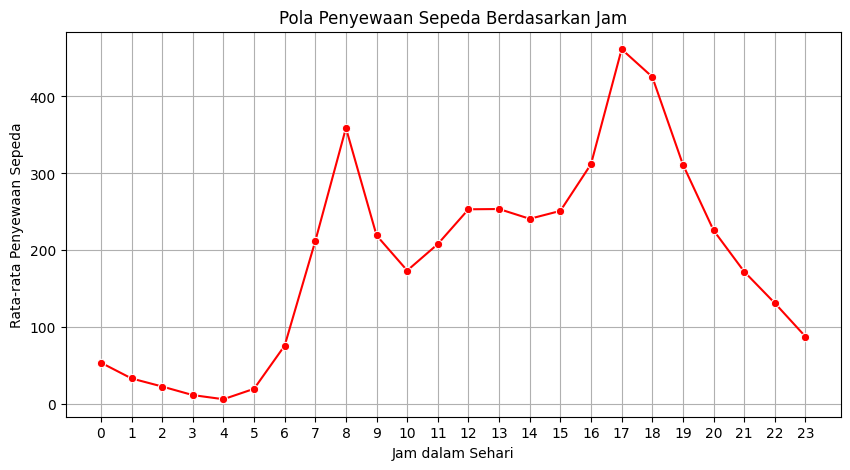

In [ ]:
# Load data
df_hour = pd.read_csv("/content/drive/MyDrive/Bike Sharing Analyst/hour.csv")

# Hitung rata-rata jumlah penyewaan berdasarkan jam
hourly_rentals = df_hour.groupby("hr")["cnt"].mean()

# Visualisasi
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o", color="red")
plt.xticks(range(0, 24))  # Pastikan sumbu-x menampilkan jam dengan benar
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam")
plt.grid()
plt.show()


### Pertanyaan 3:

Apakah cuaca berpengaruh dalam jumlah penyewaan sepeda? Pada cuaca apa penyewaan sepeda mencapai angka tertinggi dan terendah?

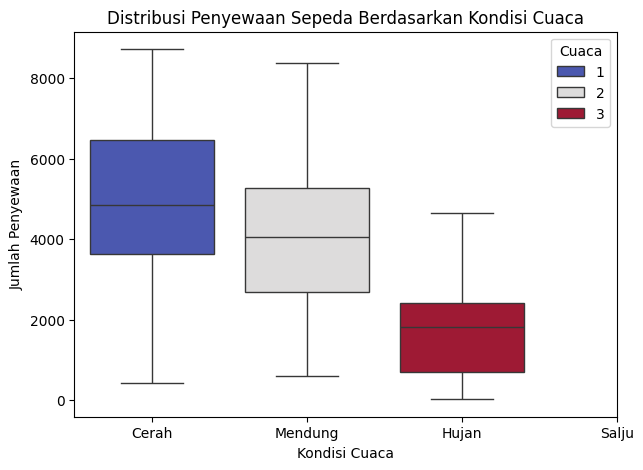

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_day, x="weathersit", y="cnt", hue="weathersit", palette="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Mendung", "Hujan", "Salju"])
plt.legend(title="Cuaca")  # Tambahkan legend
plt.show()


**Insight:**
- Hari kerja atau *weekday* memiliki tingkat penyewaan lebih stabil karena sepeda sering digunakan oleh masyarakat setempat untuk bekerja atau bepergian untuk kegiatan penting harian. Sabtu dan minggu juga cukup tinggi, hal ini kemungkinan terjadi karena masyarakat menggunakan sepeda untuk berekreasi. Hari dengan penyewaan tertinggi terjadi pada hari jumat untuk *weekday*  dan sabtu untuk *weekend*
- Jam sibuk atau jam dengan jumlah penyewaan tertinggi terjadi saat pukul 07.00-09.00 pada pagi hari dan 17.00-19.00 hal ini semakin memperkuat bahwa sepeda merupakan transportasi utama yang digunakan untuk bekerja atau sekolah. karena jam tersebut merupakan jam sibuk.
- Cuaca juga mempengaruhi jumlah penyewaan sepeda. Penyewaan sepeda terjadi paling tinggi saat cuaca rendah dan paling rendah saat hujan atau salju

## Analisa Tambahan

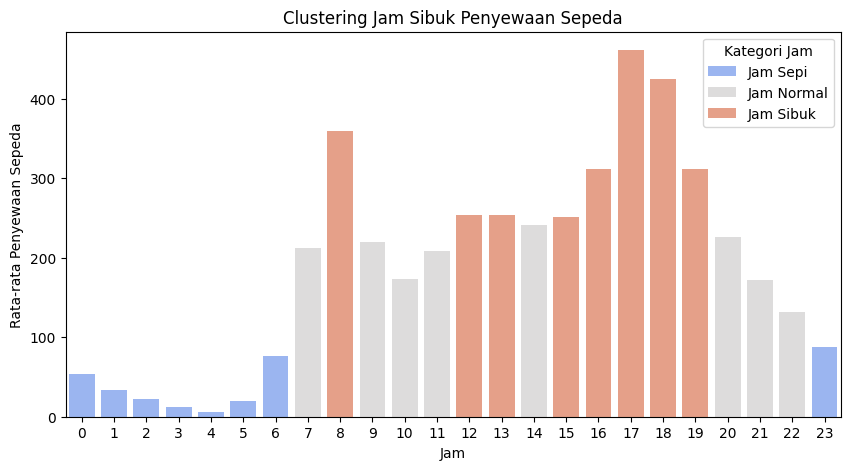

<ipython-input-19-f19d13631c9c>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rentals_by_season, x="season_name", y="cnt", palette="coolwarm")


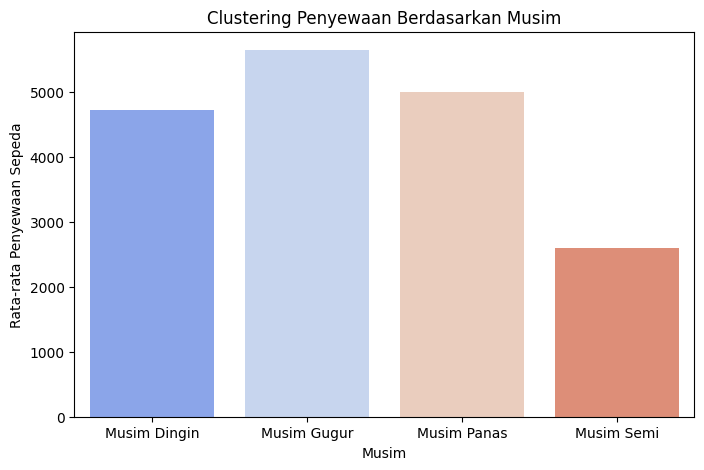

<ipython-input-19-f19d13631c9c>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rentals_by_weather, x="weather_category", y="cnt", palette="coolwarm")


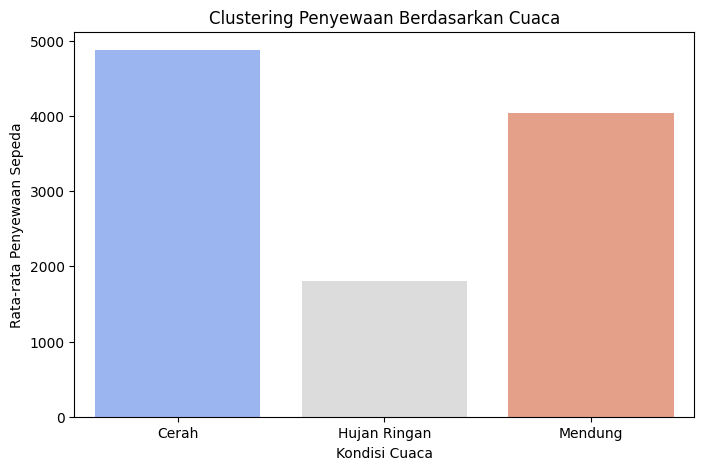

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_hour = pd.read_csv("/content/drive/MyDrive/Bike Sharing Analyst/hour.csv")
df_day = pd.read_csv("/content/drive/MyDrive/Bike Sharing Analyst/day.csv")

### 1. Clustering Berdasarkan Jam Sibuk ###
# Hitung rata-rata penyewaan per jam
avg_rentals_by_hour = df_hour.groupby("hr")["cnt"].mean().reset_index()

# Tentukan kategori jam berdasarkan persentil
q1 = avg_rentals_by_hour["cnt"].quantile(0.33)
q2 = avg_rentals_by_hour["cnt"].quantile(0.66)

def categorize_hour(x):
    if x <= q1:
        return "Jam Sepi"
    elif x <= q2:
        return "Jam Normal"
    else:
        return "Jam Sibuk"

avg_rentals_by_hour["hour_category"] = avg_rentals_by_hour["cnt"].apply(categorize_hour)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_rentals_by_hour, x="hr", y="cnt", hue="hour_category", palette="coolwarm")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Clustering Jam Sibuk Penyewaan Sepeda")
plt.legend(title="Kategori Jam")
plt.show()

### 2. Clustering Berdasarkan Musim ###
# Mapping season ke nama musim
season_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
df_day["season_name"] = df_day["season"].map(season_mapping)

# Hitung rata-rata penyewaan per musim
avg_rentals_by_season = df_day.groupby("season_name")["cnt"].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rentals_by_season, x="season_name", y="cnt", palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Clustering Penyewaan Berdasarkan Musim")
plt.show()

### 3. Clustering Berdasarkan Cuaca ###
# Mapping weathersit ke kategori cuaca
weather_mapping = {1: "Cerah", 2: "Mendung", 3: "Hujan Ringan", 4: "Hujan Lebat"}
df_day["weather_category"] = df_day["weathersit"].map(weather_mapping)

# Hitung rata-rata penyewaan per kategori cuaca
avg_rentals_by_weather = df_day.groupby("weather_category")["cnt"].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rentals_by_weather, x="weather_category", y="cnt", palette="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Clustering Penyewaan Berdasarkan Cuaca")
plt.show()


## Conclusion

Berdasarkan hasil analisis data penyewaan sepeda, ditemukan bahwa tren penyewaan mengalami peningkatan pada bulan-bulan hangat, terutama antara Mei hingga Oktober, dan mengalami penurunan signifikan selama musim dingin. Hal ini menunjukkan bahwa faktor cuaca memiliki pengaruh besar terhadap jumlah penyewaan sepeda. Selain itu, analisis pola harian menunjukkan bahwa penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, mengindikasikan bahwa banyak orang menggunakan sepeda sebagai alat transportasi utama untuk bekerja atau keperluan sehari-hari. Lebih lanjut, pola jam menunjukkan adanya dua periode sibuk, yaitu pada pagi hari sekitar pukul 07:00–09:00 dan sore hari sekitar pukul 17:00–19:00, yang menegaskan bahwa sepeda sering digunakan sebagai moda transportasi utama selama jam berangkat dan pulang kerja. Selain itu, setelah melakukan validasi data dari dua sumber, yaitu data harian dan data per jam, ditemukan bahwa jumlah penyewaan yang dikalkulasi dari data per jam sangat sesuai dengan yang dilaporkan dalam data harian. Hal ini menunjukkan bahwa dataset memiliki kualitas yang baik dan dapat digunakan untuk analisis lebih lanjut.